<a href="https://colab.research.google.com/github/jorobledo/curso_visualizacion/blob/master/Clase02_Trayecto3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

<h1> Herramientas para la visualización de datos </h1>

<h2> Academia Data Driven: Módulo 3 - Unidad 3 <h2>

Docente: <a href= "https://jorobledo.github.io/"> José Ignacio Robledo </a>
</center>




In [1]:
import matplotlib.pyplot as plt

import numpy as np

## Análisis de Componentes Principales 

In [2]:
from sklearn.decomposition import PCA

En este ejercicio práctico trataremos de entender el Análisis de Componentes Principales (PCA), desde un punto de vista geométrico. Luego generaremos un clasificador basado en Análisis Discriminante Lineal de Fisher (LDA) que clasifique al conjunto de datos en el espacio de las primeras componentes principales. 

Utilizaremos la librería `sklearn` para obtener los algoritmos de PCA, LDA y de estandarización. Usaremos `matplotlib` para graficar y `numpy` para operar con arrays principalmente.

Comencemos generando una base de datos aleatoria con cierta dispersión. Para generar número pseudo-aleatorios, podemos utilizar la librería `numpy`. Tener en cuenta que si se quiere *reproducibilidad*, se debe fijar una semilla. 

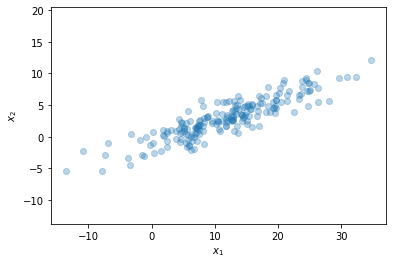

In [3]:
rng = np.random.RandomState(1) # fijamos semilla
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)*10+10).T # generamos datos aleatorios en 2D
x1 = X[:, 0] # definimos variable1
x2 = X[:, 1] # definimos variable2
plt.scatter(x1,x2, alpha=0.3) #graficamos x1 vs x2
plt.xlabel('$x_1$') # agregamos nombre al eje abscisas
plt.ylabel('$x_2$') # agregamos nombre al eje ordenadas
plt.axis('equal'); # definimos que el aspecto del gráfico sea igual para cada eje.

Luego, para realizar PCA con `sklearn` debemos instanciar la clase `PCA` con el número de componentes principales que queremos que guarde. Esta instanciación es la definición de un objeto, llamado *pca* en este caso, que es el algoritmo. Todavía no se ejecuta, hasta que no se utilice el método `fit` sobre los datos que se desee como se muestra a continuación:

In [4]:
pca = PCA(n_components=2) # instancio la clase PCA
pca.fit(X) # corro PCA sobre los datos X 

PCA(n_components=2)

Tener en cuenta que esta metodología de trabajo se repite siempre en el paquete `sklearn`. Primero definimos el algoritmo que utilizaremos y luego ajustamos y lo utilizamos.

Si queremos ver los pesos sobre de las componentes principales para cada variable, podemos usar el método `components_` de la clase PCA.

Vemos que la primera componente tiene la forma

$PC_1 = (-0.94446029) x_1 + (-0.32862557) x_2$

mientras que la segunda componente tiene la forma:

$PC_2 = (-0.32862557) x_1 + (0.94446029) x_2$.

Podemos obtener la proporción de la varianza explicada por cada componente principal con el método `explained_variance_ratio`:

In [6]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


Vemos que la primera componente se lleva un 97.6% de la variabilidad total de los datos mientras que la segunda componente sólo un 2.4%.

Recordando las expresiones para las componentes principales que obtuvimos recién a partir de `pca.components_`, podemos graficar esos vectores escalados a la variabilidad que explican en el espacio de las dos variables aleatorias utilizadas. A continuación hay una función que hace esto (no hace falta entenderla del todo):

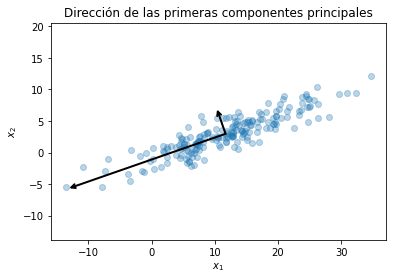

In [7]:
def draw_vector(v0, v1, ax=None):
    '''Función que dibuja los autovectores 
    obtenidos mediante PCA.'''
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# graficamos
plt.scatter(x1, x2, alpha=0.3)
for longitud, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(longitud)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.title('Dirección de las primeras componentes principales')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

Vemos que efectivamente, las direcciones de las componentes principales se orientan en las direcciones de máxima variabilidad de la nube de datos. ¿Se animan a indicar cuál es la componente principal número 1?

#### Estandarización

Muchas veces nos enfrentamos con bases de datos cuyas variables se miden en distintas unidades. Puede que midamos la altura de las personas de la base de datos en centímetros (valores rondando 170cm) y a la vez la longitud del brazo en metros (valores rondando 1m). Como el desvío estándar se mide en las mismas unidades que la variable, una unidad de desvío estándar para la altura no nos dice la misma información que una unidad de desvío estándar para la longitud del brazo. Esto puede llegar a ser un problema a la hora de utilizar PCA, ya que las escalas de las variables pueden ser muy distintas y por lo tanto pueden gobernar la forma de la nube de datos. Las componentes principales se alinearán entonces a los ejes de las variables con mayor rango de escala, que a lo mejor no son las variables de mayor variabilidad respecto a su valor medio. Es por esto que se suelen estandarizar los datos previo a implementar el PCA.   

En el código a continuación, utilizaremos la clase `StandardScaler` para estandarizar los datos que están en $X$. A los datos estandarizados los guardaremos en la variable $Xstd$. Luego graficamos los datos sin estandarizar y estandarizados para comparar.

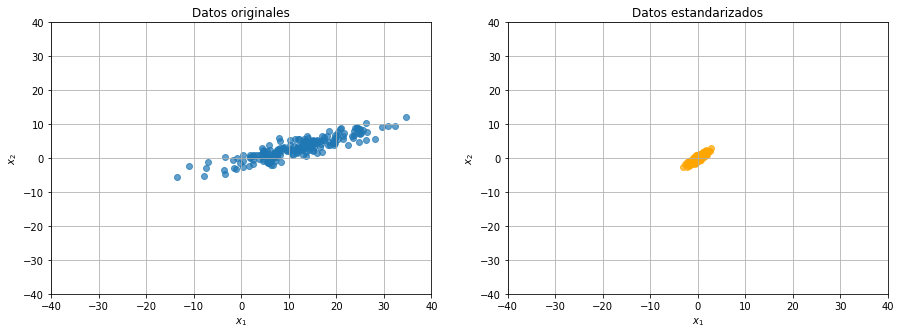

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # definimos el escaleo
Xstd = scaler.fit_transform(X) # restamos medias y dividimos por desvíos.

plt.figure(figsize=(15,5)) #inicializamos gráfico
plt.subplot(1,2,1) # inicializamos el primer subgráfico
plt.title('Datos originales') #agregamos título
plt.scatter(x1, x2, alpha=0.7) # generamos el gráfico de dispersión x1 vs x2
plt.ylim(-40,40) # fijamos los límites del eje ordenado
plt.xlim(-40,40) # fijamos los límites del eje de las abscisas
lim_x, lim_y = plt.xlim(), plt.ylim() #guardo los límites
plt.xlabel('$x_1$') # definimos la leyenda del eje x
plt.ylabel('$x_2$') # definimos la leyenda del eje y
plt.grid() # agregamos la grilla al gráfico
plt.subplot(1,2,2) # inicializamos el segundo gráfico
plt.title('Datos estandarizados') #agregamos título
plt.scatter(Xstd[:, 0], Xstd[:, 1], c='orange', alpha=0.7) # generamos gráfico de dispersión
plt.ylim(lim_y) # fijamos los límites del eje ordenado
plt.xlim(lim_x) # fijamos los límites del eje de las abscisas
plt.xlabel('$x_1$') # definimos la leyenda del eje x
plt.ylabel('$x_2$') # definimos la leyenda del eje y
plt.grid() # agregamos la grilla al gráfico
plt.show() #mostramos el gráfico

Del la figura anterior, podemos ver que al estandarizar los datos, lo que hacemos es centrar la nube de datos en el origen de coordenadas, además de corregir cada variable por su desvío estándar. Recordar que la estandarización es una transformación aplicada a los datos, por lo tanto modifica la forma de la nube de datos (la dispersión).

Una vez obtenidas las componentes principales, podemos "pararnos" en el sistema de referencia de las componentes principales. Esto es equivalente a generar una traslación de los datos al centro de la nube de datos y luego una *rotación* de la nube, a modo que quede alineada la componente principal 1 con el eje $x$. Esto lo podemos ver mejor con el siguiente gráfico:

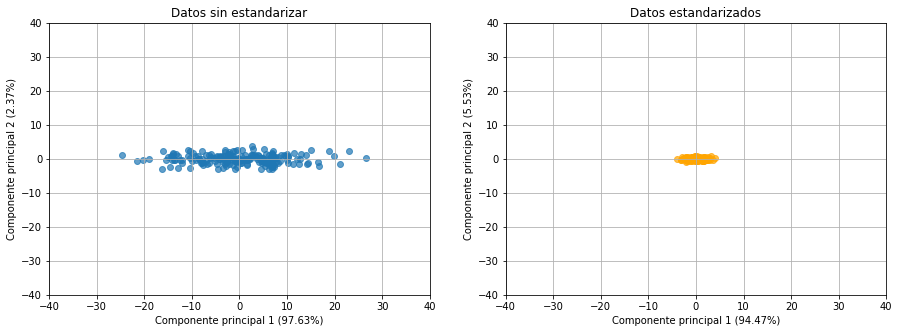

In [9]:
# Aplicamos PCA a datos con y sin estandarización
pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)
pca_std = PCA(n_components=2)
x_pca_std = pca_std.fit_transform(Xstd)

#graficamos
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Datos sin estandarizar')
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.7)
plt.xlabel(f'Componente principal 1 ({pca.explained_variance_ratio_[0] * 100:.2f}%)')
plt.ylabel(f'Componente principal 2 ({pca.explained_variance_ratio_[1] * 100:.2f}%)')
plt.xlim(lim_x)
plt.ylim(lim_y)
plt.grid()
plt.subplot(1,2,2)
plt.title('Datos estandarizados')
plt.scatter(x_pca_std[:, 0], x_pca_std[:, 1], c='orange', alpha=0.7)
plt.xlabel(f'Componente principal 1 ({pca_std.explained_variance_ratio_[0] * 100:.2f}%)')
plt.ylabel(f'Componente principal 2 ({pca_std.explained_variance_ratio_[1] * 100:.2f}%)')
plt.xlim(lim_x)
plt.ylim(lim_y)
plt.grid()
plt.show()

#### Reducción de dimensión

El PCA o ACP suele utilizarse como método de reducción de dimensionalidad. Como las componentes principales se ordenan de mayor a menor variabilidad explicada, entonces las primeras componentes suelen ser las más explicativas. Como las componentes principales son ortogonales (los vectores direccionales que vimos antes forman ángulo de 90 grados entre sí), entonces la variabilidad explicada por una componente sólo es explicada por esa componente. Por ende, si la información que nos interesa se encuentra explicada por una componente en particular, o por un subconjunto de componentes principales, entonces podemos quedarnos con esas componentes únicamente y así reducir la dimensión del conjunto de datos. 

Podemos entender esto mejor a partir del ejemplo que muestro a continuación. Vamos a quedarnos sólamente con la variabilidad explicada por la primera componente principal:

Tamaño original:    (200, 2)
Tamaño transformado: (200, 1)


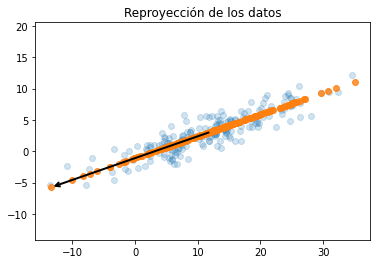

In [10]:
# Aplicamos PCA a los datos sin estandarizar y nos quedamos con una componente.
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("Tamaño original:   ", X.shape)
print("Tamaño transformado:", X_pca.shape)

# Reproyectamos los datos con la información de la componente 1 al espacio original.
X_new = pca.inverse_transform(X_pca)
plt.scatter(x1, x2, alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)

# dibujamos el vector de dirección de la componente 1
v= pca.components_[0] * 3 * np.sqrt(pca.explained_variance_[0])
draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal')
plt.title('Reproyección de los datos')
plt.show() # mostramos el gráfico

#### Visualización 3D

Se puede visualizar utilizando `matplotlib` o bien `plotly`, entre otras opciones. El mejor visualizador 3D que encontré en python hasta el momento es `plotly`:

In [93]:
import plotly.express as px
from sklearn.decomposition import PCA

df = px.data.iris()
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

pca = PCA(n_components=3)
components = pca.fit_transform(X)
total_var = pca.explained_variance_ratio_.sum() * 100

components

array([[-2.68420713,  0.32660731, -0.02151184],
       [-2.71539062, -0.16955685, -0.20352143],
       [-2.88981954, -0.13734561,  0.02470924],
       [-2.7464372 , -0.31112432,  0.03767198],
       [-2.72859298,  0.33392456,  0.0962297 ],
       [-2.27989736,  0.74778271,  0.17432562],
       [-2.82089068, -0.08210451,  0.26425109],
       [-2.62648199,  0.17040535, -0.01580151],
       [-2.88795857, -0.57079803,  0.02733541],
       [-2.67384469, -0.1066917 , -0.1915333 ],
       [-2.50652679,  0.65193501, -0.069275  ],
       [-2.61314272,  0.02152063,  0.10765035],
       [-2.78743398, -0.22774019, -0.20032779],
       [-3.22520045, -0.50327991,  0.06841363],
       [-2.64354322,  1.1861949 , -0.1445057 ],
       [-2.38386932,  1.34475434,  0.28373066],
       [-2.6225262 ,  0.81808967,  0.14531599],
       [-2.64832273,  0.31913667,  0.03339425],
       [-2.19907796,  0.87924409, -0.11452146],
       [-2.58734619,  0.52047364,  0.21957209],
       [-2.3105317 ,  0.39786782, -0.233

In [94]:
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

####Visualización de los vectores de pesos (BIPLOT)

In [95]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

df = px.data.iris()
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features]

pca = PCA(n_components=2)
components = pca.fit_transform(X)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1, color=df['species'])

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

## Árboles de decisión

In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
import graphviz

####Regresión

En este caso el criterio de regresión suele ser el ECM

$H(Q_m)=\frac{1}{n_m}\sum_{y\in Q_m}(y-\bar{y}_m)^2$

[Documentación](https://scikit-learn.org/stable/modules/tree.html#tree-mathematical-formulation)

In [14]:
boston = datasets.load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [16]:

X2 = boston.data[:, 12]  # Only using the LSTAT feature (percentage of lower status of the population)
y2 = boston.target

# Sort X and y by ascending values of X

sort_idx = X2.flatten().argsort()
X2 = X2[sort_idx].reshape(-1, 1)
y2 = y2[sort_idx]

In [17]:
clf2 = tree.DecisionTreeRegressor(max_depth=3, criterion="mse")
clf2 = clf2.fit(X2, y2)

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


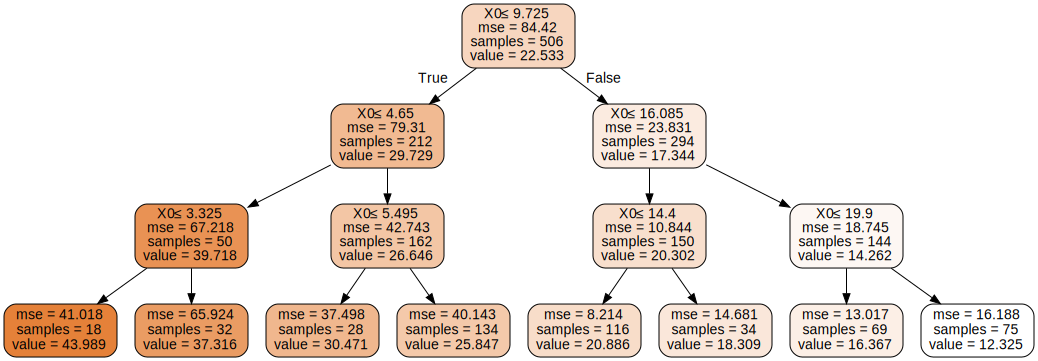

In [18]:
dot_data = tree.export_graphviz(clf2, out_file=None, 
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

Podemos graficar el resultado

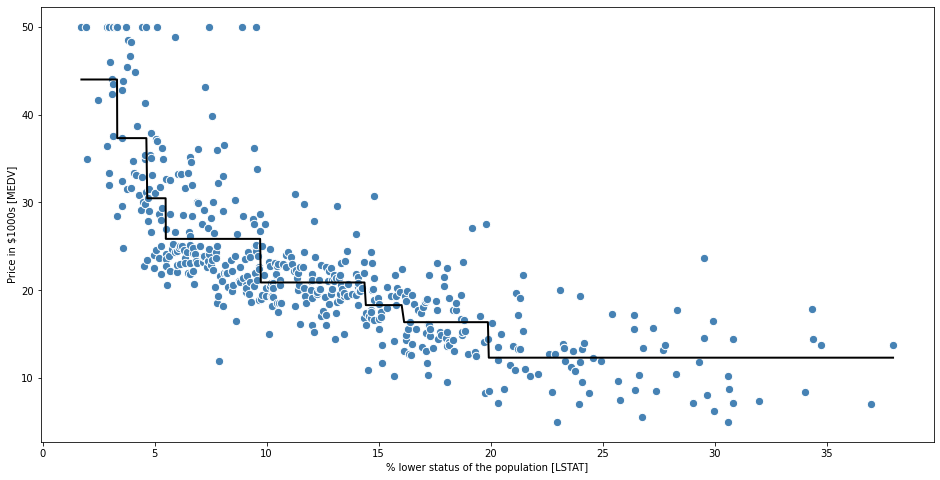

In [19]:
plt.figure(figsize=(16, 8))
plt.scatter(X2, y2, c='steelblue',
            edgecolor='white', s=70)
plt.plot(X2, clf2.predict(X2),
         color='black', lw=2)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

#### Clasificación

In [21]:
import pandas as pd
#cargamos los datos
iris = datasets.load_iris()
X, y = iris.data, iris.target

#armamos dataframe para visualizar
df = pd.DataFrame(X,columns=iris.feature_names)
df['Especie'] = y
df['Especie'].replace({0:'setosa', 1:'versicolor', 2:'virginica'},
                      inplace=True)

print(iris.target_names)
print(iris.feature_names)
df

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       Especie  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

Para facilitar la comprensión, lo que vamos a hacer es sólo generar un modelo de clasificación teniendo en cuenta únicamente las características del sépalo. Como son dos variables, podremos ver exactamente las regiones de decisión en un gráfico bidimensional (sin tener que fijar las otras variables).

The prediction accuracy is:  92.66666666666666 %


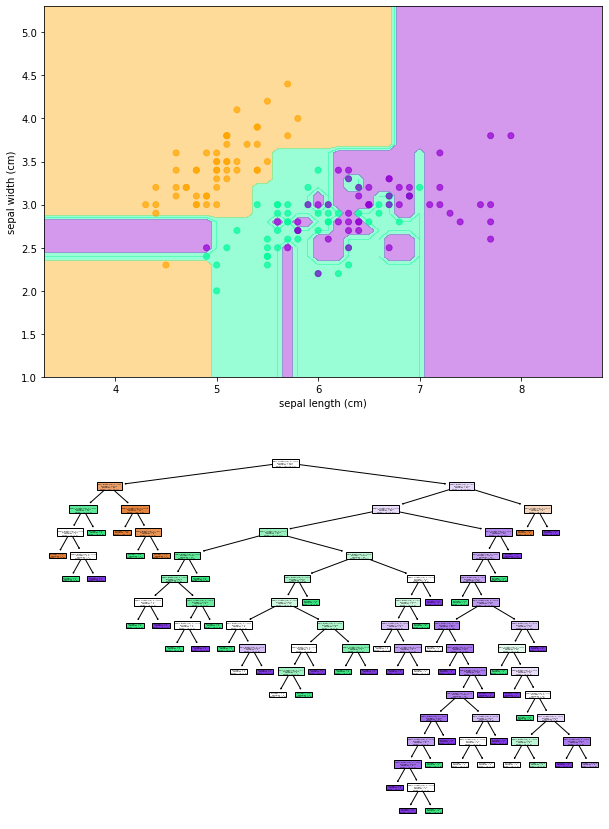

In [23]:
from matplotlib.colors import ListedColormap

X1 = X[:,:2]
clf = tree.DecisionTreeClassifier(criterion='entropy',
                                   random_state=1)
clf.fit(X1, y)

print("The prediction accuracy is: ",clf.score(X1,y)*100,"%")
# Busco los valores máximos y mínimos de las variables de sépalo        
x_min, x_max = iris.data[:, 0].min() - 1, iris.data[:, 0].max() + 1
y_min, y_max = iris.data[:, 1].min() - 1, iris.data[:, 1].max() + 1

# Armo grilla de puntos donde vamos a predecir para armar las regiones
xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z2 = clf.predict(np.c_[xx1.ravel(),xx2.ravel()])
Z2 = Z2.reshape(xx1.shape)

plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
cmap = ListedColormap(["orange","mediumspringgreen", "darkviolet"])
plt.contourf(xx1, xx2, Z2, alpha=0.4, cmap=cmap, levels=3)

#defino los colores necesarios para que quede más bonito y consistente con los colores del árbol.
cmap = ListedColormap(["mediumspringgreen", "darkviolet"])
ycolor = []
for caso in y:
    if caso == 0:
        ycolor.append("orange")
    elif caso == 1:
        ycolor.append("mediumspringgreen")
    elif caso == 2:
        ycolor.append("darkviolet")
    else:
        ycolor.append(np.nan)
        
#Agregamos todos los otros datos, pero más suavecitos. El valor de alpha determina la transparencia.
plt.scatter(df['sepal length (cm)'],
            df['sepal width (cm)'], c=ycolor,alpha=0.7)
#Agregamos formato al primer gráfico
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')


plt.subplot(2,1,2)
tree.plot_tree(clf,
               feature_names=iris.feature_names[:2],
               filled=True)
plt.show()

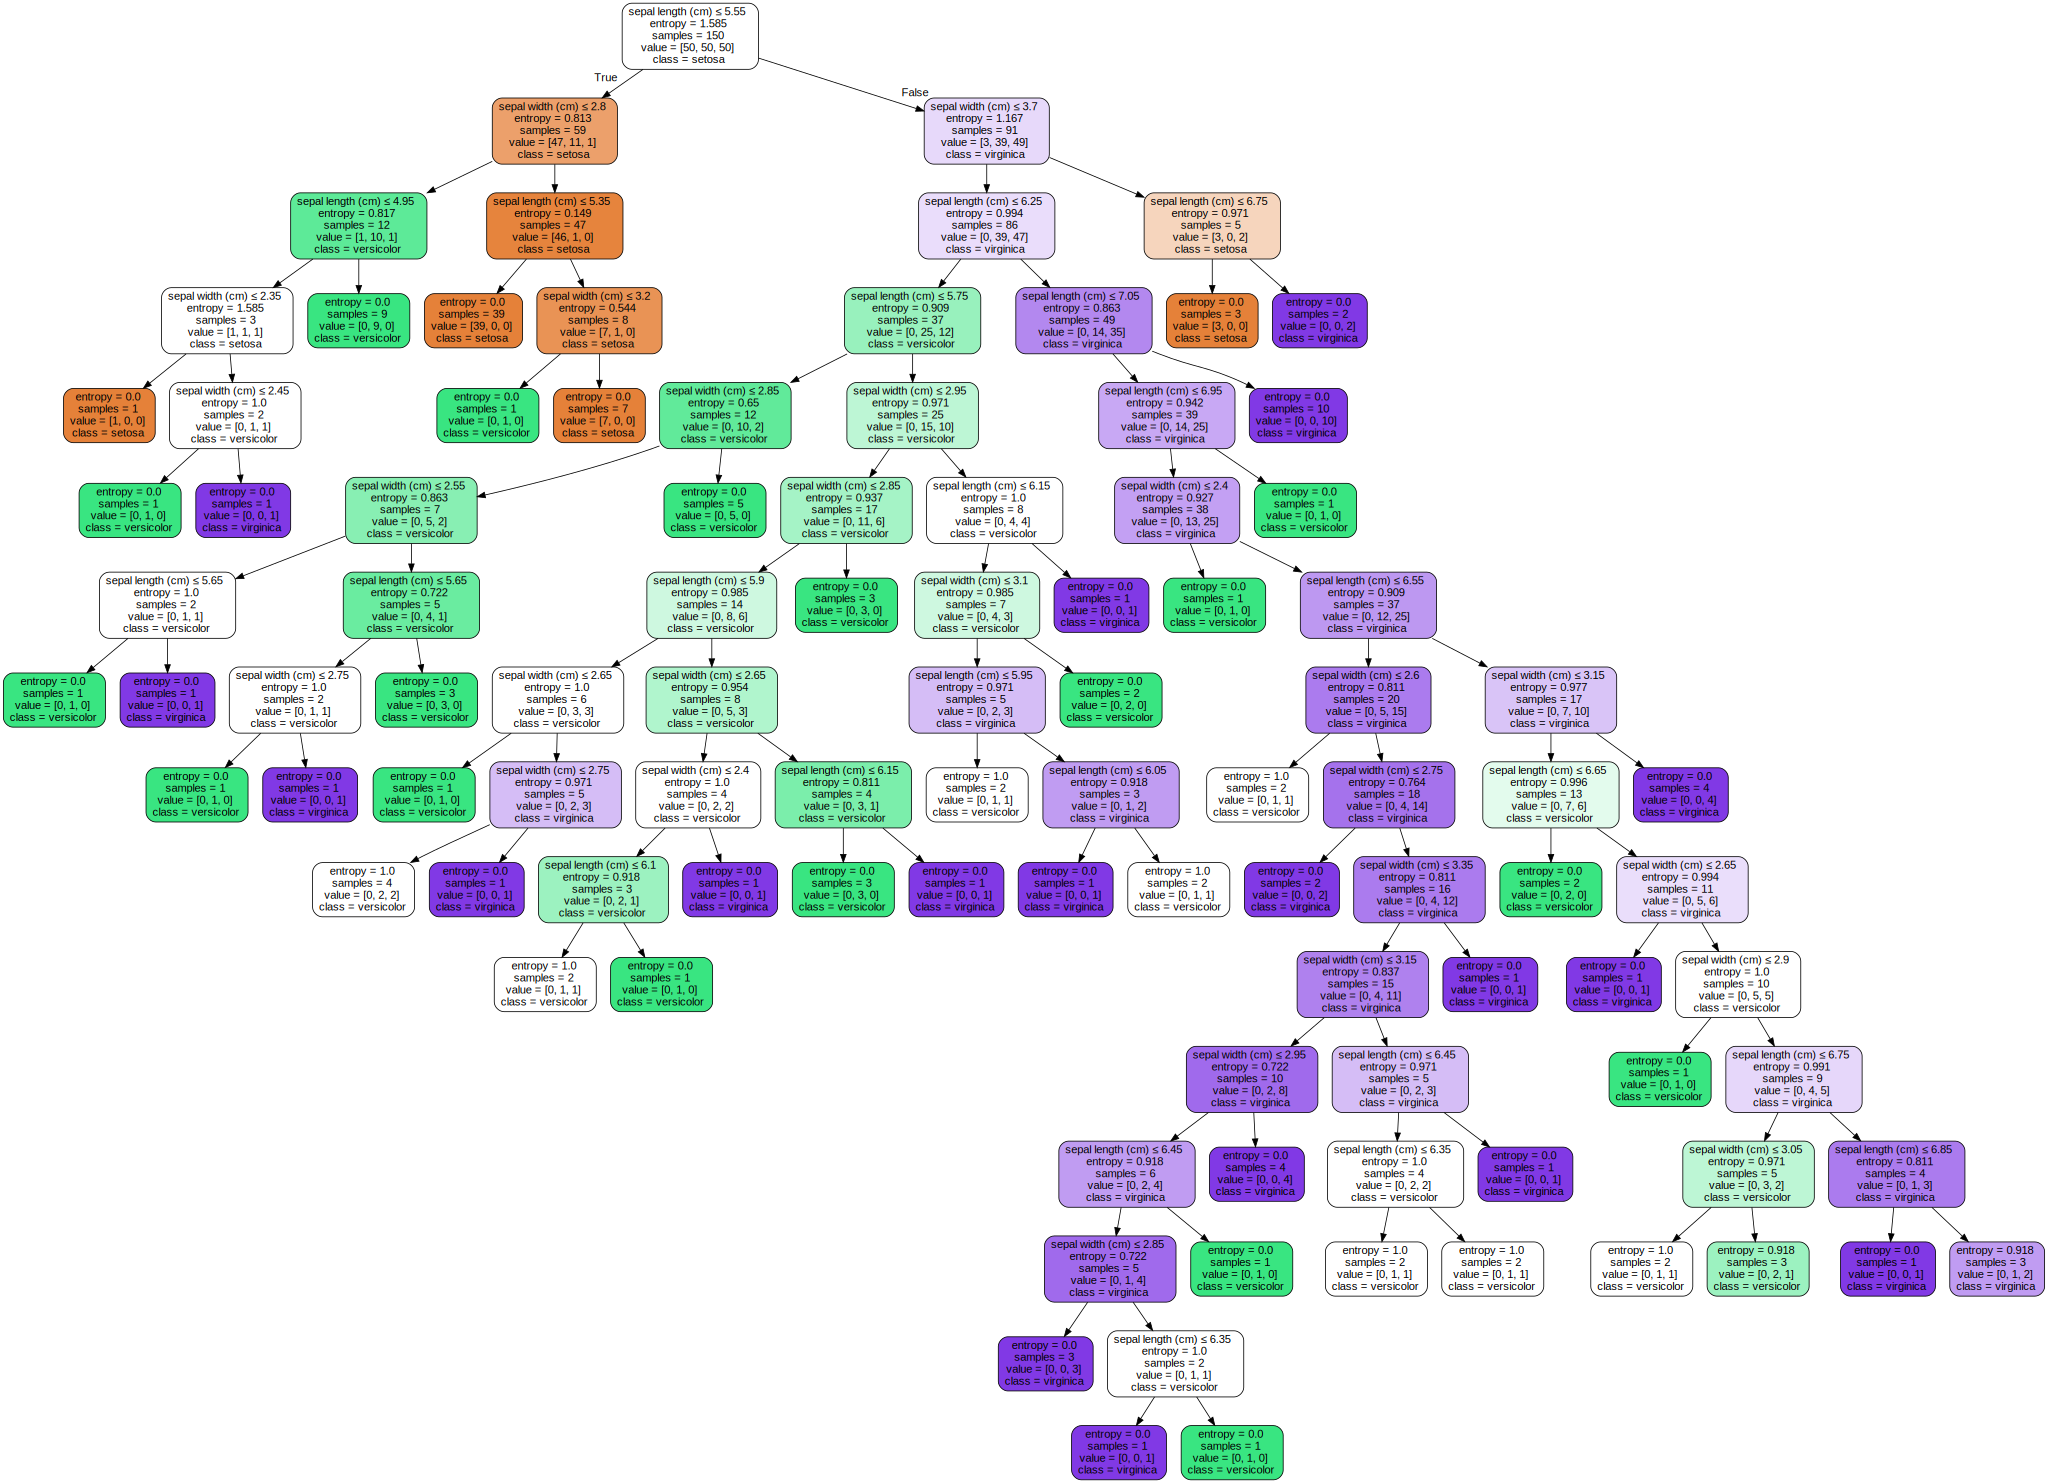

In [24]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names[:2],  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(dot_data)
graph

Otra forma de inspeccionar el árbol es el método `export_text` del módulo `tree` de `sklearn` que permite visualizar el árbol de decisión en texto. A partir de inspeccionar el árbol de decisión, podemos entender la forma de las regiones de decisión.

In [25]:
print(tree.export_text(clf,feature_names=iris.feature_names[:2]))

|--- sepal length (cm) <= 5.55
|   |--- sepal width (cm) <= 2.80
|   |   |--- sepal length (cm) <= 4.95
|   |   |   |--- sepal width (cm) <= 2.35
|   |   |   |   |--- class: 0
|   |   |   |--- sepal width (cm) >  2.35
|   |   |   |   |--- sepal width (cm) <= 2.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal width (cm) >  2.45
|   |   |   |   |   |--- class: 2
|   |   |--- sepal length (cm) >  4.95
|   |   |   |--- class: 1
|   |--- sepal width (cm) >  2.80
|   |   |--- sepal length (cm) <= 5.35
|   |   |   |--- class: 0
|   |   |--- sepal length (cm) >  5.35
|   |   |   |--- sepal width (cm) <= 3.20
|   |   |   |   |--- class: 1
|   |   |   |--- sepal width (cm) >  3.20
|   |   |   |   |--- class: 0
|--- sepal length (cm) >  5.55
|   |--- sepal width (cm) <= 3.70
|   |   |--- sepal length (cm) <= 6.25
|   |   |   |--- sepal length (cm) <= 5.75
|   |   |   |   |--- sepal width (cm) <= 2.85
|   |   |   |   |   |--- sepal width (cm) <= 2.55
|   |   |   |   |   |   |--- sep

## Wordmap

## Gráficos animados con Bokeh

## Dashboards con Bokeh

#### [hvPlot](https://hvplot.holoviz.org/)

Permite utilizar los métodos de pandas con bokeh o plotly en vez de matplotlib

<img src=https://hvplot.holoviz.org/assets/diagram.svg>

In [27]:
!pip install hvplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.2 MB 5.3 MB/s 


In [44]:
credit_risk_path = "https://raw.githubusercontent.com/jorobledo/curso_visualizacion/master/datasets/credit_risk_dataset.csv"
credit_data = pd.read_csv(credit_risk_path)
credit_data.columns = ['Edad', 
                       'Ingresos', 
                       'Situacion de vivienda', 
                       'Tiempo de empleo', 
                       'Tipo de préstamo', 
                       'Grado del préstamo', 
                       'Monto del préstamo', 
                       'Tasa de interés', 
                       'Estado del préstamo', 
                       'Porcentaje del Ingreso', 
                       'Default histórico', 
                       'Long. historial crediticio']
credit_data

Edad  Ingresos Situacion de vivienda  Tiempo de empleo  \
0        22     59000                  RENT             123.0   
1        21      9600                   OWN               5.0   
2        25      9600              MORTGAGE               1.0   
3        23     65500                  RENT               4.0   
4        24     54400                  RENT               8.0   
...     ...       ...                   ...               ...   
32576    57     53000              MORTGAGE               1.0   
32577    54    120000              MORTGAGE               4.0   
32578    65     76000                  RENT               3.0   
32579    56    150000              MORTGAGE               5.0   
32580    66     42000                  RENT               2.0   

      Tipo de préstamo Grado del préstamo  Monto del préstamo  \
0             PERSONAL                  D               35000   
1            EDUCATION                  B                1000   
2              MEDICAL                  C                5500   
3              MEDICAL                  C               35000   
4              MEDICAL                  C               35000   
...                ...                ...                 ...   
32576         PERSONAL                  C                5800   
32577         PERSONAL                  A               17625   
32578  HOMEIMPROVEMENT                  B               35000   
32579         PERSONAL                  B               15000   
32580          MEDICAL                  B                6475   

       Tasa de interés  Estado del préstamo  Porcentaje del Ingreso  \
0                16.02                    1                    0.59   
1                11.14                    0                    0.10   
2                12.87                    1                    0.57   
3                15.23                    1                    0.53   
4                14.27                    1                    0.55   
...                ...                  ...                     ...   
32576            13.16                    0                    0.11   
32577             7.49                    0                    0.15   
32578            10.99                    1                    0.46   
32579            11.48                    0                    0.10   
32580             9.99                    0                    0.15   

      Default histórico  Long. historial crediticio  
0                     Y                           3  
1                     N                           2  
2                     N                           3  
3                     N                           2  
4                     Y                           4  
...                 ...                         ...  
32576                 N                          30  
32577                 N                          19  
32578                 N                          28  
32579                 N                          26  
32580                 N                          30  

[32581 rows x 12 columns]

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
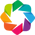

:NdOverlay   [Estado del préstamo]
   :Scatter   [Monto del préstamo]   (Porcentaje del Ingreso)

In [53]:
import hvplot.pandas  # noqa
import holoviews as hv

hv.extension('bokeh')

credit_data.hvplot.scatter(x='Monto del préstamo', y='Porcentaje del Ingreso', by='Estado del préstamo')

#### Panel


Permite armar los botones y sliders para agregar interactividad. Ver [documentación](https://panel.holoviz.org/getting_started/index.html)

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
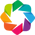

Row
    [0] ParamFunction(function)
    [1] Spacer(width=15)
    [2] Column(width=200)
        [0] Spacer(height=30)
        [1] FloatSlider(end=5, name='µ', start=-5)
        [2] Spacer(height=15)
        [3] FloatSlider(end=5, name='σ', start=0.1, value=1)

In [72]:
import panel as pn
import scipy

hv.extension('bokeh')
opts = dict(show_grid=True, frame_height=200, frame_width=350, color="#1f77b3")


def plot_normal_pdf(mu=0, sigma=1):
    x = np.linspace(-10, 10, 200)
    y = scipy.stats.norm.pdf(x, loc=mu, scale=sigma)

    return hv.Curve(data=(x, y), kdims=["x"], vdims=["f(x ; μ, σ)"]).opts(
        **opts
    )


mu_slider = pn.widgets.FloatSlider(
    name="µ", start=-5, end=5, step=0.1, value=0
)
sigma_slider = pn.widgets.FloatSlider(
    name="σ", start=0.1, end=5, step=0.1, value=1
)


@pn.depends(mu_slider.param.value, sigma_slider.param.value)
def plot_normal_pdf(mu=0, sigma=1):
    x = np.linspace(-10, 10, 200)
    y = scipy.stats.norm.pdf(x, loc=mu, scale=sigma)

    return hv.Curve(data=(x, y), kdims=["x"], vdims=["f(x ; μ, σ)"]).opts(
        **opts
    )


widgets = pn.Column(
    pn.Spacer(height=30),
    mu_slider,
    pn.Spacer(height=15),
    sigma_slider,
    width=200,
)

pn.Row(plot_normal_pdf, pn.Spacer(width=15), widgets)

#### Selector de color con Bokeh

In [73]:
from bokeh.io import show
from bokeh.layouts import column
from bokeh.models import ColorPicker
from bokeh.plotting import Figure

plot = Figure(x_range=(0, 1), y_range=(0, 1), width=350, height=350)
line = plot.line(x=(0,1), y=(0,1), color="black", line_width=4)

picker = ColorPicker(title="Line Color")
picker.js_link('color', line.glyph, 'line_color')

show(column(plot, picker))

#### Tabs en Bokeh
Permiten elegir entre pestañas

In [74]:
from bokeh.io import show
from bokeh.models import Panel, Tabs
from bokeh.plotting import figure

p1 = figure(width=300, height=300)
p1.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=20, color="navy", alpha=0.5)
tab1 = Panel(child=p1, title="circle")

p2 = figure(width=300, height=300)
p2.line([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], line_width=3, color="navy", alpha=0.5)
tab2 = Panel(child=p2, title="line")

show(Tabs(tabs=[tab1, tab2]))

#### Spinners en Bokeh

Widget que permite elegir entre números de a pasos

In [91]:
import numpy as np

from bokeh.io import show
from bokeh.layouts import column, row
from bokeh.models import Spinner
from bokeh.plotting import figure
from bokeh.io import show
from bokeh.models import CustomJS, Slider

x = np.random.rand(10)
y = np.random.rand(10)

p = figure(x_range=(0, 1), y_range=(0, 1))
points = p.scatter(x=x, y=y, size=4)

spinner = Spinner(title="Glyph size", low=1, high=40, step=0.5, value=4, width=80)
spinner.js_link('value', points.glyph, 'size')

show(row(column(children=[spinner], width=100), p))

## Bibliografía

[Análisis de Componentes Principales](https://setosa.io/ev/principal-component-analysis/)

[bokeh](https://notebooks.gesis.org/binder/jupyter/user/bokeh-bokeh-notebooks-8452t79o/notebooks/tutorial/11%20-%20Running%20Bokeh%20Applications.ipynb)

[ejemplo dashboard](https://github.com/bokeh/bokeh/tree/branch-3.0/examples/app/dash)

[Información sobre deployment de Dashboards en Bokeh](https://docs.bokeh.org/en/latest/docs/user_guide/server.html#single-module-format)